In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=load_iris()

In [4]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
print(dataset.DESCR)

In [ ]:
dataset.data

In [5]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df= pd.DataFrame(dataset.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df["target"]=dataset.target

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df["class"]=df["target"].map({0:"seltosa",1:"versicolor",2:"virginica"})

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,seltosa
1,4.9,3.0,1.4,0.2,0,seltosa
2,4.7,3.2,1.3,0.2,0,seltosa
3,4.6,3.1,1.5,0.2,0,seltosa
4,5.0,3.6,1.4,0.2,0,seltosa


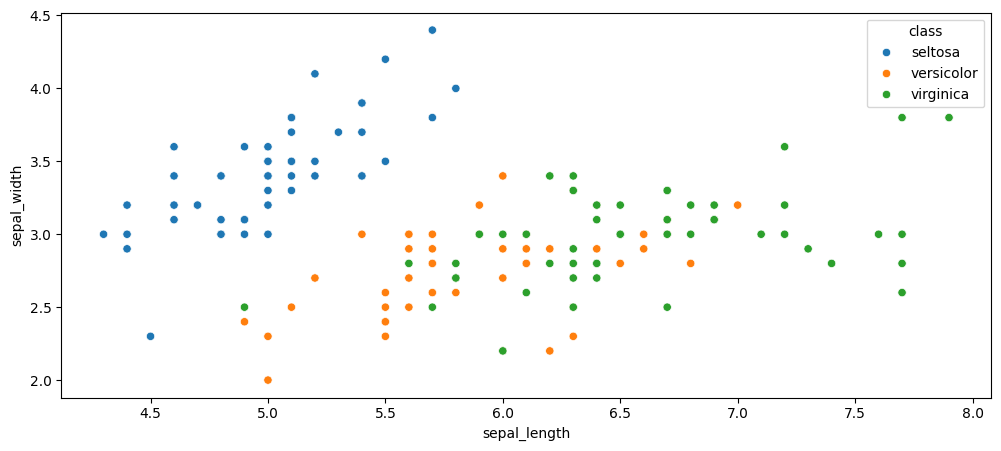

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(df,x="sepal_length",y="sepal_width",hue="class")
plt.show()

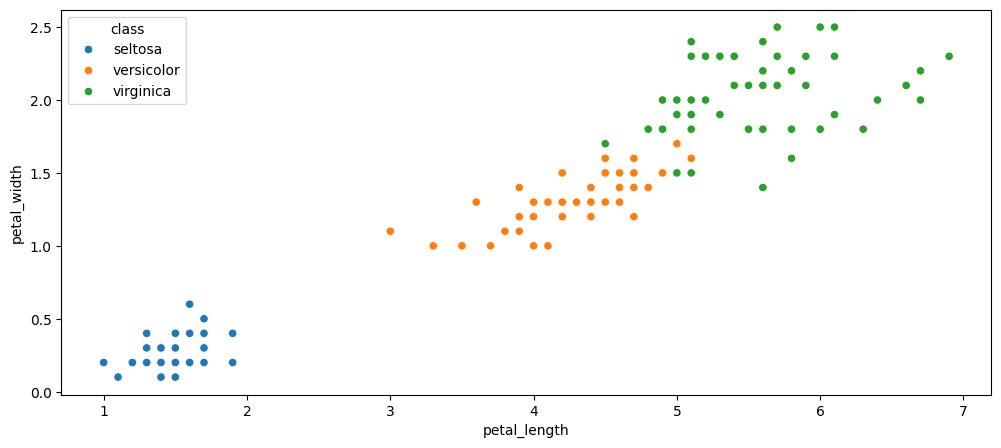

In [15]:
plt.figure(figsize=(12,5))
sns.scatterplot(df,x="petal_length",y="petal_width",hue="class")
plt.show()

In [16]:
df.iloc[:50]

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,seltosa
1,4.9,3.0,1.4,0.2,0,seltosa
2,4.7,3.2,1.3,0.2,0,seltosa
3,4.6,3.1,1.5,0.2,0,seltosa
4,5.0,3.6,1.4,0.2,0,seltosa
5,5.4,3.9,1.7,0.4,0,seltosa
6,4.6,3.4,1.4,0.3,0,seltosa
7,5.0,3.4,1.5,0.2,0,seltosa
8,4.4,2.9,1.4,0.2,0,seltosa
9,4.9,3.1,1.5,0.1,0,seltosa


In [ ]:
df.iloc[50:100]

In [ ]:
df.iloc[100:]

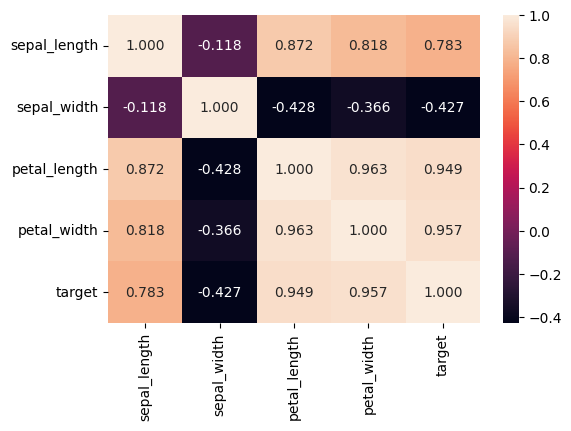

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop("class",axis=1).corr(),annot=True,fmt=".3f")
plt.show()

In [19]:
x=df.drop(["target","class"],axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y=df["class"]
y

0        seltosa
1        seltosa
2        seltosa
3        seltosa
4        seltosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [21]:
x_train,x_test,y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=45)

In [22]:
x_train.shape

(112, 4)

In [23]:
x_test.shape

(38, 4)

In [24]:
model = DecisionTreeClassifier()

In [1]:
model.fit(x_train,y_train)

NameError: name 'model' is not defined

In [26]:
trainning_score= model.score(x_train,y_train)
trainning_score

1.0

In [27]:
y_pred= model.predict(x_test)

In [28]:
testing_score= accuracy_score(y_test,y_pred)
testing_score

0.9473684210526315

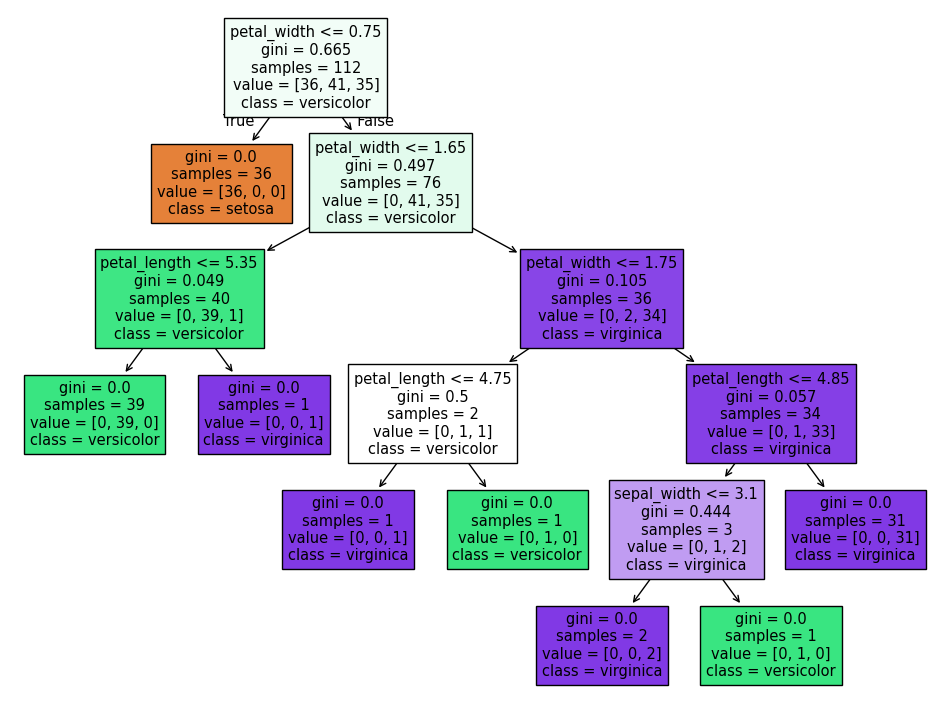

In [29]:
plt.figure(figsize=(12,9))
plot_tree(model, filled=True, class_names=dataset.target_names,feature_names=x.columns)
plt.show()

In [30]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [31]:
df[df["petal_width"]<0.75]

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,seltosa
1,4.9,3.0,1.4,0.2,0,seltosa
2,4.7,3.2,1.3,0.2,0,seltosa
3,4.6,3.1,1.5,0.2,0,seltosa
4,5.0,3.6,1.4,0.2,0,seltosa
5,5.4,3.9,1.7,0.4,0,seltosa
6,4.6,3.4,1.4,0.3,0,seltosa
7,5.0,3.4,1.5,0.2,0,seltosa
8,4.4,2.9,1.4,0.2,0,seltosa
9,4.9,3.1,1.5,0.1,0,seltosa


In [32]:
tunned_model = DecisionTreeClassifier(max_depth=2,max_features=3)

In [33]:
tunned_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features=3)

In [34]:
train_acc_tunned = tunned_model.score(x_train,y_train)
train_acc_tunned

0.9732142857142857

In [35]:
y_pred_tunned=tunned_model.predict(x_test)

In [36]:
test_acc_tunned= accuracy_score(y_test,y_pred_tunned)
test_acc_tunned

0.9210526315789473

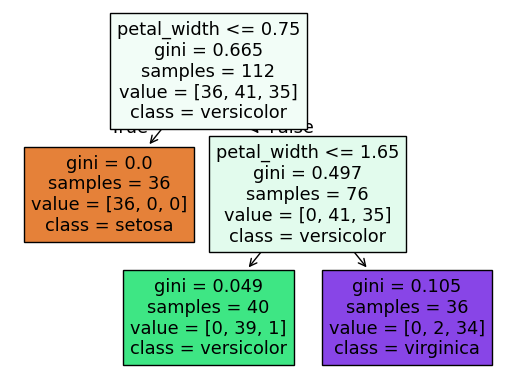

In [37]:
# plt.figure(figsize=(12,9))
plot_tree(tunned_model, filled=True, class_names=dataset.target_names,feature_names=x.columns)
plt.show()

In [38]:
parameters = {"criterion": ["gini","entropy"],"max_depth":[1,2,3,4,5],"max_features":[1,2,3,4],"random_state":[23,53,12,85,43]}

The parameters dictionary you've defined is commonly used for hyperparameter tuning in decision tree classifiers or similar models
* criterion: Specifies the function used to measure the quality of a split.
    * "gini": Gini Impurity.
    * "entropy": Information Gain (Entropy).
      
* max_depth: The maximum depth of the tree. Controls overfitting by restricting the tree's size.

* max_features: The number of features to consider when looking for the best split. Limits the feature set to avoid overfitting.

* random_state: Seeds for the random number generator, ensuring reproducibility of results.

In [39]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,verbose=True, n_jobs=-1, cv=5, scoring="accuracy")

GridSearchCV, a tool from scikit-learn for hyperparameter tuning. It performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a model.
* GridSearchCV systematically tests combinations of hyperparameters to determine the best ones for the model.
* estimator=DecisionTreeClassifier()
    * This is the model for which you are performing hyperparameter tuning.
    * The Decision Tree Classifier will be evaluated with various parameter combinations.
* param_grid=parameters
    * This is a dictionary defining the hyperparameter values to test.
    * This grid will evaluate all combinations of the provided values.
* verbose=True
    * Displays detailed progress logs during the grid search.
    * Useful to monitor progress, especially when testing many combinations.
* n_jobs=-1
    * Specifies the number of CPU cores to use.
    * -1 means use all available cores, speeding up the computation.
* cv=5
    * Specifies the number of folds for cross-validation.
    * The dataset is split into 5 subsets (folds), and the model is trained on 4 folds while the remaining fold is used for validation.
    * This process repeats 5 times (once for each fold).
* scoring="accuracy"
    * The evaluation metric to optimize during grid search.
    * In this case, accuracy is used to determine the best parameter combination.

In [40]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'random_state': [23, 53, 12, 85, 43]},
             scoring='accuracy', verbose=True)

In [41]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'random_state': 85}

In [42]:
pre_model = DecisionTreeClassifier(max_depth=2, max_features=2, criterion="gini",random_state=85)

* DecisionTreeClassifier
    * A machine learning model that builds a decision tree for classification tasks by recursively splitting the data based on feature values.
* max_depth=2
    * Limits the maximum depth of the tree to 2 levels.
    * Reduces the complexity of the model and prevents overfitting.
* max_features=2
    * Limits the number of features considered at each split to 2.
    * During each split, the model randomly selects a subset of 2 features (from all available features) and finds the best split using only those.
* criterion="gini"
    * Specifies the impurity measure used to evaluate splits.
* Gini Impurity:
    * Measures how often a randomly chosen element would be incorrectly classified.
    * Lower Gini values indicate purer splits.
    * Alternative: "entropy" (based on information gain).
* random_state=85
    * Sets the seed for the random number generator.
    * Ensures reproducibility, so the same results are obtained when the code is run multiple times.

* DecisionTreeClassifier
    * A machine learning model that builds a decision tree for classification tasks by recursively splitting the data based on feature values.

In [43]:
pre_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features=2, random_state=85)

In [44]:
train_acc_pre=pre_model.score(x_train,y_train)
train_acc_pre

0.9732142857142857

In [45]:
y_pred_pre = pre_model.predict(x_test)

In [46]:
test_acc_score = accuracy_score(y_test,y_pred_pre)
test_acc_score

0.9210526315789473

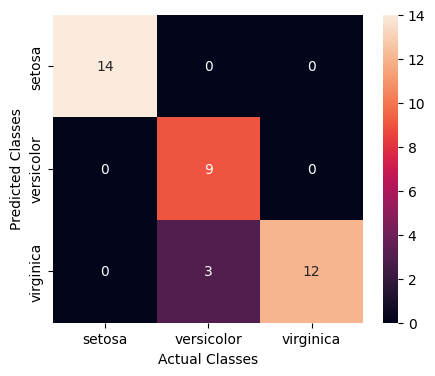

In [47]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred_tunned),annot=True,fmt="d",xticklabels=dataset.target_names,yticklabels=dataset.target_names)
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

In [48]:
import joblib

In [49]:
joblib.dump(model, "DT_Model_Export")

['DT_Model_Export']